In [1]:
!pip install yfinance



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\chinm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
ticker = input("Enter hte stock ticker(e.g, AAPL,TSLA,etc): ")

df=yf.download(ticker,start="2016-01-01")
df.head(2)

C:\Users\chinm\AppData\Local\Temp\ipykernel_24564\660241117.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start="2016-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753145,23.757656,22.997825,23.135361,270597600
2016-01-05,23.157919,23.865891,23.090279,23.843345,223164000


In [16]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2492 entries, 2016-01-04 to 2025-11-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2492 non-null   float64
 1   (High, AAPL)    2492 non-null   float64
 2   (Low, AAPL)     2492 non-null   float64
 3   (Open, AAPL)    2492 non-null   float64
 4   (Volume, AAPL)  2492 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 116.8 KB


((2492, 5), None)

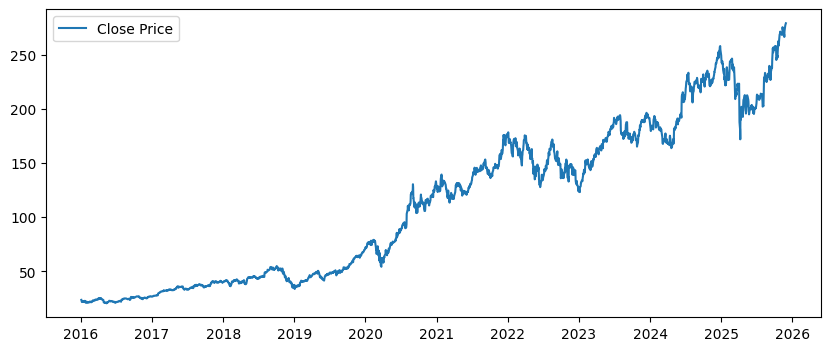

In [17]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'],label="Close Price")
plt.legend()
plt.show()

In [18]:
df.index.max()

Timestamp('2025-11-28 00:00:00')

In [19]:
df.columns = [col[0] for col in df.columns]

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-04,23.753145,23.757656,22.997825,23.135361,270597600
2016-01-05,23.157919,23.865891,23.090279,23.843345,223164000
2016-01-06,22.704721,23.081256,22.517584,22.673156,273829600
2016-01-07,21.746477,22.576203,21.741969,22.249274,324377600
2016-01-08,21.861467,22.346226,21.816374,22.219964,283192000


In [22]:
df['Return'] = df['Close'].pct_change()
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()

df['Target'] = df['Close'].shift(-1)

df = df.dropna()

df.head()



,Close,High,Low,Open,Volume,Return,Lag1,Lag2,MA5,MA10,Target
Date,,,,,,,,,,,
2016-01-15,21.899796,22.030568,21.500716,21.690109,319335600,-0.024015,22.438669,21.958416,22.210042,22.427394,21.793831
2016-01-19,21.793831,22.242514,21.532286,22.188402,212350800,-0.004839,21.899796,22.438669,22.125717,22.231462,21.823143
2016-01-20,21.823143,22.138800,21.063312,21.442100,289337600,0.001345,21.793831,21.899796,21.982771,22.097985,21.712658
2016-01-21,21.712658,22.068898,21.406020,21.884013,208646000,-0.005063,21.823143,21.793831,21.933619,21.998779,22.867058
2016-01-22,22.867058,22.876077,22.179379,22.237999,263202000,0.053167,21.712658,21.823143,22.019297,22.110837,22.420630


In [24]:
features = ['Lag1','Lag2','MA5','MA10','Return']
X = df[features]
y=df['Target']

train_size = int(len(df)*0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print("Training row: ", len(X_train))
print("Testing row: ", len(X_test))




Training row:  1985
Testing row:  497


In [25]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
linReg_pred = linReg.predict(X_test)

mae_linReg = mean_absolute_error(y_test,linReg_pred)
rmse_linReg = np.sqrt(mean_squared_error(y_test,linReg_pred))
r2_linReg = r2_score(y_test,linReg_pred)

print("Linear Regression: ")
print("MAE: ",mae_linReg)
print("RMSE: ",rmse_linReg)
print("R2: ",r2_linReg)

Linear Regression: 
MAE:  3.0752070500986948
RMSE:  4.406114214278975
R2:  0.9730243184003182


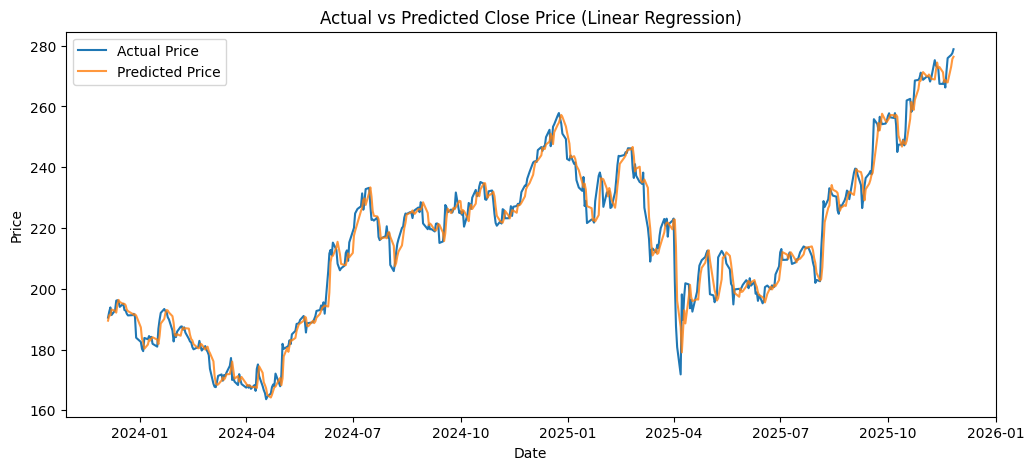

In [31]:
plt.figure(figsize=(12,5))

plt.plot(y_test.index, y_test, label="Actual Price")
plt.plot(y_test.index, linReg_pred, label="Predicted Price", alpha=0.8)

plt.title("Actual vs Predicted Close Price (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [32]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, y_train)

pred_ridge = model_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred_ridge))
r2_ridge = r2_score(y_test, pred_ridge)

print("Ridge Regression Performance:")
print("MAE :", mae_ridge)
print("RMSE:", rmse_ridge)
print("R²  :", r2_ridge)


Ridge Regression Performance:
MAE : 3.4296488266353444
RMSE: 4.8490864065541945
R²  : 0.9673276200046156


In [33]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train)

pred_lasso = model_lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))
r2_lasso = r2_score(y_test, pred_lasso)

print("Lasso Regression Performance:")
print("MAE :", mae_lasso)
print("RMSE:", rmse_lasso)
print("R²  :", r2_lasso)


Lasso Regression Performance:
MAE : 3.1046683877655696
RMSE: 4.472085396631607
R²  : 0.97221047640089


C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e+03, tolerance: 6.019e+02
  model = cd_fast.enet_coordinate_descent(


In [34]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet(alpha=0.001, l1_ratio=0.5)
model_en.fit(X_train, y_train)

pred_en = model_en.predict(X_test)

mae_en = mean_absolute_error(y_test, pred_en)
rmse_en = np.sqrt(mean_squared_error(y_test, pred_en))
r2_en = r2_score(y_test, pred_en)

print("ElasticNet Performance:")
print("MAE :", mae_en)
print("RMSE:", rmse_en)
print("R²  :", r2_en)


ElasticNet Performance:
MAE : 3.4566231308712734
RMSE: 4.970727226824632
R²  : 0.9656678668175425


C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.722e+03, tolerance: 6.019e+02
  model = cd_fast.enet_coordinate_descent(


In [35]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet"],
    "MAE": [mae_linReg, mae_ridge, mae_lasso, mae_en],
    "RMSE": [rmse_linReg, rmse_ridge, rmse_lasso, rmse_en],
    "R² Score": [r2_linReg, r2_ridge, r2_lasso, r2_en]
})

results


,Model,MAE,RMSE,R² Score
0,Linear Regression,3.075207,4.406114,0.973024
1,Ridge Regression,3.429649,4.849086,0.967328
2,Lasso Regression,3.104668,4.472085,0.972210
3,ElasticNet,3.456623,4.970727,0.965668


In [36]:
import joblib
joblib.dump(linReg,"stock_model.pkl")

['stock_model.pkl']

In [ ]:
def create_features(df):
    df = df.copy()   
    
    df['Return'] = df['Close'].pct_change()
    df['Lag1'] = df['Close'].shift(1)
    df['Lag2'] = df['Close'].shift(2)
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    
    df = df.dropna()
    return df


In [ ]:

df_features = create_features(df)

df_features.tail()


,Close,High,Low,Open,Volume,Return,Lag1,Lag2,MA5,MA10,Target
Date,,,,,,,,,,,
2025-11-20,266.250000,275.429993,265.920013,270.829987,45823600,-0.008601,268.559998,267.440002,268.423999,270.142999,271.489990
2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800,0.019681,266.250000,268.559998,268.239996,270.470999,275.920013
2025-11-24,275.920013,277.000000,270.899994,270.899994,65585800,0.016317,271.489990,266.250000,269.932001,271.120001,276.970001
2025-11-25,276.970001,280.380005,275.250000,275.269989,46914200,0.003805,275.920013,271.489990,271.838000,271.292001,277.549988
2025-11-26,277.549988,279.529999,276.630005,276.959991,33431400,0.002094,276.970001,275.920013,273.635999,271.700000,278.850006


In [42]:

df_features = create_features(df)
features = ['Lag1', 'Lag2', 'MA5', 'MA10', 'Return']
latest_features = df_features[features].tail(1)
latest_features


,Lag1,Lag2,MA5,MA10,Return
Date,,,,,
2025-11-26,276.970001,275.920013,273.635999,271.7,0.002094


In [44]:
linReg.predict(latest_features)


array([276.3672279])

In [49]:
def prepare_data_for_ticker(ticker):
    # 1. Download data
    df = yf.download(ticker, start="2016-01-01")
    
    # 2. Flatten columns if they are MultiIndex
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [col[0] for col in df.columns]
    
    # 3. Apply feature engineering
    df = create_features(df)
    
    # 4. Keep only the needed columns
    features = ['Lag1', 'Lag2', 'MA5', 'MA10', 'Return']
    
    # 5. Drop NaN rows (important!!)
    df = df.dropna(subset=features)
    
    # 6. Take LAST VALID ROW
    latest = df[features].tail(1)
    
    return latest


In [50]:
ticker = input("Enter ticker for final pipeline test: ")
latest = prepare_data_for_ticker(ticker)
print("Latest features for prediction:")
display(latest)
print("\nPredicted next-day closing price:")
prediction = linReg.predict(latest)
prediction


C:\Users\chinm\AppData\Local\Temp\ipykernel_24564\1135502392.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2016-01-01")
[*********************100%***********************]  1 of 1 completed

Latest features for prediction:


,Lag1,Lag2,MA5,MA10,Return
Date,,,,,
2025-12-01,278.850006,277.549988,277.542004,272.891,-0.001542



Predicted next-day closing price:


array([279.26732529])